In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Download the data from the above link. How many ".csv" files are available in the dataset?

In [2]:
df_links = pd.read_csv(r"C:\Users\Arpan Ghosh\OneDrive\Desktop\AI_Internship\movie_data\links.csv")

In [3]:
df_links

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9737,193581,5476944,432131.0
9738,193583,5914996,445030.0
9739,193585,6397426,479308.0
9740,193587,8391976,483455.0


In [4]:
df_movie = pd.read_csv(r"C:\Users\Arpan Ghosh\OneDrive\Desktop\AI_Internship\movie_data\movies.csv")

In [5]:
df_movie

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


#### What is the shape of "movies.csv"?

In [6]:
df_movie.shape

(9742, 3)

In [7]:
df_ratings = pd.read_csv(r"C:\Users\Arpan Ghosh\OneDrive\Desktop\AI_Internship\movie_data\ratings.csv")

In [8]:
df_ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


#### What is the shape of "ratings.csv"?

In [9]:
df_ratings.shape

(100836, 4)

#### How many unique "userId" are available in "ratings.csv"?

In [10]:
df_ratings.nunique()

userId         610
movieId       9724
rating          10
timestamp    85043
dtype: int64

In [11]:
df_tags = pd.read_csv(r"C:\Users\Arpan Ghosh\OneDrive\Desktop\AI_Internship\movie_data\tags.csv")

In [12]:
df_tags

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
...,...,...,...,...
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978


#### Which movie has recieved maximum number of user ratings?


In [13]:
df_ratings["movieId"].value_counts()

356       329
318       317
296       307
593       279
2571      278
         ... 
86279       1
86922       1
5962        1
87660       1
163981      1
Name: movieId, Length: 9724, dtype: int64

In [14]:
max_ratings_movieId = df_ratings["movieId"].value_counts().idxmax()
max_ratings_movieId 

356

In [15]:
max_ratings_movie = df_movie[df_movie['movieId'] == max_ratings_movieId]

In [16]:
max_ratings_movie

,movieId,title,genres
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War


#### Select all the correct tags submitted by users to "Matrix, The (1999)" movie?

In [ ]:
df_movie.head(2)

In [18]:
matrix_movieId = df_movie[df_movie["title"] == "Matrix, The (1999)"]['movieId'].values[0]
matrix_movieId

2571

In [19]:
df_tags[df_tags['movieId'] == matrix_movieId][['tag']]

,tag
815,martial arts
816,sci-fi
1646,alternate universe
2794,philosophy
2795,post apocalyptic


In [20]:
tags_for_movie = df_tags[df_tags['movieId'] == matrix_movieId]
tags_for_movie

,userId,movieId,tag,timestamp
815,424,2571,martial arts,1457842912
816,424,2571,sci-fi,1457842899
1646,474,2571,alternate universe,1137204991
2794,537,2571,philosophy,1424141098
2795,537,2571,post apocalyptic,1424141101


In [21]:
tags_grouped = tags_for_movie.groupby('movieId')['tag'].apply(lambda x: ', '.join(x)).reset_index()
tags_grouped 

,movieId,tag
0,2571,"martial arts, sci-fi, alternate universe, phil..."


#### What is the average user rating for movie named "Terminator 2: Judgment Day (1991)"?

In [22]:
terminator_movieId = df_movie[df_movie["title"] == "Terminator 2: Judgment Day (1991)"]['movieId'].values[0]
terminator_movieId

589

In [23]:
ratings_for_movie = df_ratings[df_ratings['movieId'] == terminator_movieId]
ratings_for_movie

,userId,movieId,rating,timestamp
552,5,589,3.0,847435258
806,6,589,3.0,845553317
886,7,589,2.5,1106635940
1286,11,589,4.0,902154266
1449,15,589,5.0,1510572012
...,...,...,...,...
97461,606,589,3.5,1171325855
98514,607,589,4.0,963078960
98786,608,589,3.0,1117415154
99519,609,589,3.0,847220990


In [24]:
ratings_for_movie['rating'].mean()

3.970982142857143

#### How does the data distribution of user ratings for "Fight Club (1999)" movie looks like?

In [25]:
Fight_movieId = df_movie[df_movie["title"] == "Fight Club (1999)"]['movieId'].values[0]
Fight_movieId

2959

In [26]:
ratings_for_movie = df_ratings[df_ratings['movieId'] == Fight_movieId]
ratings_for_movie

,userId,movieId,rating,timestamp
192,1,2959,5.0,964983282
458,4,2959,2.0,945078528
1134,10,2959,0.5,1455356582
1479,15,2959,2.5,1510571747
1635,16,2959,3.5,1377476874
...,...,...,...,...
95893,601,2959,5.0,1441639461
96788,603,2959,4.0,963176105
97835,606,2959,5.0,1171231517
99107,608,2959,5.0,1117336631


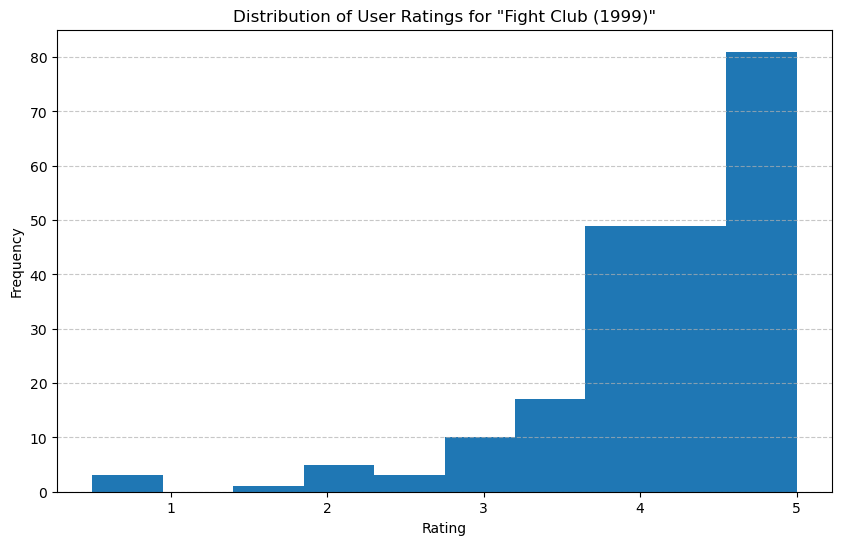

In [27]:
plt.figure(figsize=(10, 6))
plt.hist(ratings_for_movie['rating'])
plt.title('Distribution of User Ratings for "Fight Club (1999)"')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.xticks(range(1, 6))  # Assuming ratings are on a scale of 1 to 5
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### 🟢 IMPORTANT NOTE 1 🟢
'''Now that you have a good enough understanding of the given data, apply the "Mandatory Operation" given below before solving any of the following questions.

Mandatory Operations:
1. Group the user ratings based on movieId and apply aggregation operations like count and mean on ratings. 
2. Apply inner join on dataframe created from movies.csv and the grouped df from step 1.
3. Filter only those movies which have more than 50 user ratings (i.e. > 50).

Above steps will make sure that your data contains only those movies which has recieved more than 50 user ratings.'''

#### Step 1: Group by movieId and aggregate ratings

In [46]:
ratings_grouped = df_ratings.groupby('movieId').agg(
    rating_count=('rating', 'size'),
    average_rating=('rating', 'mean'))

In [29]:
ratings_grouped

,rating_count,average_rating
movieId,,
1,215,3.920930
2,110,3.431818
3,52,3.259615
4,7,2.357143
5,49,3.071429
...,...,...
193581,1,4.000000
193583,1,3.500000
193585,1,3.500000


#### Step 2: Inner join with df_movie

In [30]:
df_movie.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [31]:
ratings_grouped.head()

,rating_count,average_rating
movieId,,
1,215,3.920930
2,110,3.431818
3,52,3.259615
4,7,2.357143
5,49,3.071429


In [32]:
# Step 2: Inner join with df_movie

movies_with_ratings = pd.merge(df_movie, ratings_grouped, on='movieId')
movies_with_ratings

,movieId,title,genres,rating_count,average_rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,7,2.357143
4,5,Father of the Bride Part II (1995),Comedy,49,3.071429
...,...,...,...,...,...
9719,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,1,4.000000
9720,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,1,3.500000
9721,193585,Flint (2017),Drama,1,3.500000
9722,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,1,3.500000


#### Step 3: Filter movies with more than 50 ratings

In [33]:

filtered_movies = movies_with_ratings[movies_with_ratings['rating_count'] > 50]

filtered_movies

,movieId,title,genres,rating_count,average_rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
5,6,Heat (1995),Action|Crime|Thriller,102,3.946078
6,7,Sabrina (1995),Comedy|Romance,54,3.185185
...,...,...,...,...,...
8287,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,54,3.916667
8354,109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama,52,3.778846
8358,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151
8457,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847


#### Which movie is the most popular based on  average user ratings?


In [34]:
most_popular_movie = filtered_movies.sort_values(by='average_rating', ascending=False)

most_popular_movie

,movieId,title,genres,rating_count,average_rating
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,317,4.429022
659,858,"Godfather, The (1972)",Crime|Drama,192,4.289062
2224,2959,Fight Club (1999),Action|Crime|Drama|Thriller,218,4.272936
974,1276,Cool Hand Luke (1967),Drama,57,4.271930
602,750,Dr. Strangelove or: How I Learned to Stop Worr...,Comedy|War,97,4.268041
...,...,...,...,...,...
144,172,Johnny Mnemonic (1995),Action|Sci-Fi|Thriller,53,2.679245
145,173,Judge Dredd (1995),Action|Crime|Sci-Fi,62,2.669355
376,432,City Slickers II: The Legend of Curly's Gold (...,Adventure|Comedy|Western,55,2.645455
379,435,Coneheads (1993),Comedy|Sci-Fi,63,2.420635


In [35]:
most_popular_movie.iloc[0]

movieId                                        318
title             Shawshank Redemption, The (1994)
genres                                 Crime|Drama
rating_count                                   317
average_rating                            4.429022
Name: 277, dtype: object

#### Select all the correct options which comes under top 5 popular movies based on number of user ratings.

In [36]:
filtered_movies.sort_values(by='rating_count', ascending=False).head(5)

,movieId,title,genres,rating_count,average_rating
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,329,4.164134
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,317,4.429022
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307,4.197068
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279,4.161290
1938,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278,4.192446


#### Which Sci-Fi movie is "third most popular" based on the number of user ratings?

In [37]:
sci_fi_movies = filtered_movies[filtered_movies['genres'].str.contains('Sci-Fi', na=False)]

sci_fi_movies

,movieId,title,genres,rating_count,average_rating
31,32,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller,177,3.983051
133,160,Congo (1995),Action|Adventure|Mystery|Sci-Fi,57,2.877193
144,172,Johnny Mnemonic (1995),Action|Sci-Fi|Thriller,53,2.679245
145,173,Judge Dredd (1995),Action|Crime|Sci-Fi,62,2.669355
176,208,Waterworld (1995),Action|Adventure|Sci-Fi,115,2.913043
...,...,...,...,...,...
7675,89745,"Avengers, The (2012)",Action|Adventure|Sci-Fi|IMAX,69,3.869565
7749,91500,The Hunger Games (2012),Action|Adventure|Drama|Sci-Fi|Thriller,54,3.435185
8358,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151
8457,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847


In [38]:
sorted_sci_fi_movies = sci_fi_movies.sort_values(by='rating_count', ascending=False).iloc[2]

sorted_sci_fi_movies

movieId                                        480
title                         Jurassic Park (1993)
genres            Action|Adventure|Sci-Fi|Thriller
rating_count                                   238
average_rating                                3.75
Name: 418, dtype: object

#### 🟢 IMPORTANT NOTE 2 🟢
You already have a subset of data containing only those movies which has recieved more than 50 user ratings.

Using "links.csv", scrape the IMDB reviews of each movie with more than 50 user ratings. "README.md" file contains the required details.

If you are unable to write the webscraping script yourself, you can request the same by commenting LinkedIn Post.

#### Mention the movieId of the movie which has the highest IMDB rating.

In [64]:
# Find the maximum IMDB ID
max_imdbId = df_links['imdbId'].max()

print(f"The highest IMDB ID is: {max_imdbId}")

# Find the row with the highest IMDB ID
highest_imdbId_row = df_links.loc[df_links['imdbId'].idxmax()]

# Print the movieId and imdbId with the highest imdbId
print(f"The movieId with the highest IMDB ID ({max_imdbId}) is: {highest_imdbId_row['movieId']}")

The highest IMDB ID is: 8391976
The movieId with the highest IMDB ID (8391976) is: 193587.0


#### Mention the movieId of the "Sci-Fi" movie which has the highest IMDB rating.